In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers.core import Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.models import load_model

import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import os
import random

from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import datasets

import time
from PIL import Image
from numba import jit
import pickle
from pathlib import Path
import skimage.measure

from keras.optimizers import Adam

from keras.models import load_model
from sklearn import metrics

Using TensorFlow backend.


In [3]:
def chart_regression(pred,y,sort=True, plot_name = 'pred'):
    pred_folder = 'pred/'
    ex = '.png'
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    
    y_true = test_label
    y_pred = np.squeeze(pred)
    erro = (np.abs((y_true - y_pred) / y_true)) * 100
    
    
    a = plt.plot(t['y'].tolist(),label='exact')
    b = plt.plot(t['pred'].tolist(),label='prediction', linestyle='dashed')
    plt.ylabel('$E_{GS}/L$')
    plt.xlabel('samples')
    #axes = plt.gca()
    #axes.set_ylim([-4,0])
    plt.legend()
    plt.title('RMSE ='+ str(np.round(100000*score)/100000))
    #plt.savefig(pred_folder + plot_name + ex)
    plt.show()
    
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 10k
---

## Pool 

In [3]:
dataset = pd.read_csv('csv/pool_10k.csv')

path_folder = 'data/matrix_pool_more/'

#writing the columns of the csv in an list
X_1 = dataset.iloc[:,1].values
Y_1 = dataset.iloc[:,3].values

W = np.random.permutation(np.c_[X_1.reshape(len(X_1), -1), Y_1.reshape(len(Y_1), -1)])

X = W[:, :X_1.size//len(X_1)].reshape(X_1.shape)
Y = W[:, X_1.size//len(X_1):].reshape(Y_1.shape)

x_train = np.array([X[i] for i in range((len(X)//10),len(X))])
y_train = np.array([Y[i] for i in range((len(Y)//10),len(Y))])

x_test = np.array([X[i] for i in range((len(X)//10))])
y_test = np.array([Y[i] for i in range((len(Y)//10))])

test_data = []

load_test_data = []
for file in x_test[0:1000]:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test[0:1000]:
    test_label.append(file)
test_label = np.array(test_label)

In [5]:
model = load_model('h5/pool_train_10k.h5')

Score (RMSE): 0.014074658902991817


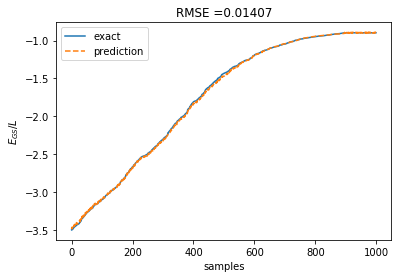

In [6]:
pred = model.predict(test_data, batch_size=128)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_pool_10k')

In [8]:
result = pd.DataFrame(pred)
result.to_csv("pred_pool_10k.csv")

label = pd.DataFrame(test_label)
label.to_csv("label_pool_10k.csv")

## Random 

In [4]:
dataset = pd.read_csv('csv/rand_more.csv')
path_folder = 'data/matrix_del_rand_more/'

#writing the columns of the csv in an list
X_1 = dataset.iloc[:,1].values
Y_1 = dataset.iloc[:,2].values

W = np.random.permutation(np.c_[X_1.reshape(len(X_1), -1), Y_1.reshape(len(Y_1), -1)])

X = W[:, :X_1.size//len(X_1)].reshape(X_1.shape)
Y = W[:, X_1.size//len(X_1):].reshape(Y_1.shape)

x_train = np.array([X[i] for i in range((len(X)//10),len(X))])
y_train = np.array([Y[i] for i in range((len(Y)//10),len(Y))])

x_test = np.array([X[i] for i in range((len(X)//10))])
y_test = np.array([Y[i] for i in range((len(Y)//10))])


test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [5]:
model = load_model('h5/train_rand_10k.h5')

Score (RMSE): 0.19041727407295692


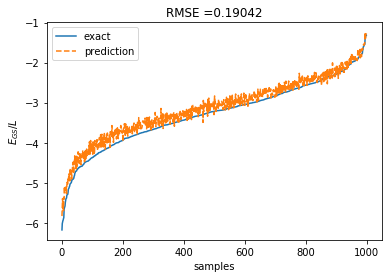

In [8]:
pred = model.predict(test_data, batch_size=128)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_rand_10k')

---
# Just test
---

## Radom small mag

In [8]:
path_folder = 'data/matrix_rand/'
dataset = pd.read_csv('csv/rand_small_mag.csv')

#writing the columns of the csv in an list
X_1 = dataset.iloc[:,1].values
Y_1 = dataset.iloc[:,2].values

W = np.random.permutation(np.c_[X_1.reshape(len(X_1), -1), Y_1.reshape(len(Y_1), -1)])

X = W[:, :X_1.size//len(X_1)].reshape(X_1.shape)
Y = W[:, X_1.size//len(X_1):].reshape(Y_1.shape)


test_data = []

load_test_data = []
for file in X[0:100]:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in Y[0:100]:
    test_label.append(file)
test_label = np.array(test_label)

In [62]:
print(X.shape)

(100,)


In [9]:
model = load_model('h5/my_model.h5')

100/100 [==============================] - 10s 99ms/step
Score (RMSE): 0.29153563767115553


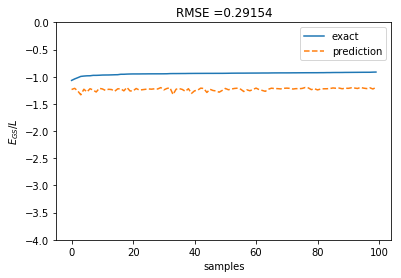

In [13]:
pred = model.predict(test_data, batch_size=128, verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_small_mag')

## All mag

In [28]:
path_folder = 'data/matrix_rand/'
dataset = pd.read_csv('csv/rand_all_mag.csv')

#writing the columns of the csv in an list
X_1 = dataset.iloc[:,1].values
Y_1 = dataset.iloc[:,2].values

W = np.random.permutation(np.c_[X_1.reshape(len(X_1), -1), Y_1.reshape(len(Y_1), -1)])

X = W[:, :X_1.size//len(X_1)].reshape(X_1.shape)
Y = W[:, X_1.size//len(X_1):].reshape(Y_1.shape)


test_data = []

load_test_data = []
for file in X:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in Y:
    test_label.append(file)
test_label = np.array(test_label)

In [26]:
print(test_)

[-2.7323301387724515 -3.949807386562641 -4.292664872991386
 -2.9770328888102267 -1.7457435968077153 -2.1743015333328657
 -1.7463395765861107 -4.48284342479733 -3.8789251049547406
 -2.9011617442591517 -4.029131327064219 -2.546208553139333
 -3.4367701587954427 -4.028309443751435 -4.233514899865487
 -1.8639447974808736 -3.608808193735397 -2.1922059629386936
 -2.668716719102872 -4.723793491647036 -2.6078269500779587
 -4.408438420299164 -2.5383586518093875 -2.9917362239575285
 -2.518857602411294 -2.8886030770821534 -2.8661795072610015
 -2.88752923795654 -3.811850125811977 -3.0791966050603468
 -2.019767097772924 -3.404261472410024 -4.813049749565659
 -3.883985019396383 -1.8893471918928475 -3.533506254305937
 -4.557988377938983 -3.087884386681636 -2.832073013802593
 -3.93141837341244 -2.9535203960424496 -3.225592771118229
 -2.638527918766078 -1.8400322853686035 -3.470560457275978
 -3.401607264531941 -4.497769743676696 -3.3046175108841496
 -3.3506899269939248 -2.611605624415814 -3.814815592134

In [29]:
model = load_model('h5/my_model.h5')

100/100 [==============================] - 10s 103ms/step
Score (RMSE): 2.262712124310257


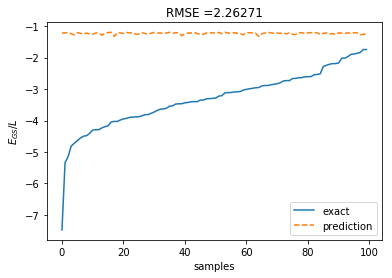

In [30]:
pred = model.predict(test_data, batch_size=128, verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_all_mag')

## Pool

In [81]:
path_folder = 'data/matrix_pool/'
dataset = pd.read_csv('csv/pool.csv')

#writing the columns of the csv in an list
X_1 = dataset.iloc[:,1].values
Y_1 = dataset.iloc[:,3].values

W = np.random.permutation(np.c_[X_1.reshape(len(X_1), -1), Y_1.reshape(len(Y_1), -1)])

X = W[:, :X_1.size//len(X_1)].reshape(X_1.shape)
Y = W[:, X_1.size//len(X_1):].reshape(Y_1.shape)


test_data = []

load_test_data = []
for file in X[0:100]:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in Y[0:100]:
    test_label.append(file)
test_label = np.array(test_label)

In [79]:
model = load_model('h5/my_model.h5')

Score (RMSE): 0.5256468943250299


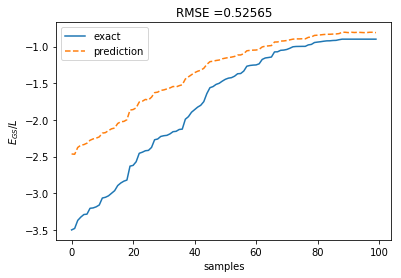

In [82]:
pred = model.predict(test_data, batch_size=128)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_pool')

---
# Retrain 500
---

## Random

In [17]:
dataset_x = pd.read_csv('csv/x_test_rand_retrain_500.csv')
dataset_y = pd.read_csv('csv/y_test_rand_retrain_500.csv')

path_folder = 'data/matrix_rand_500/'

#writing the columns of the csv in an list
x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [18]:
model = load_model('h5/retrain_rand_500.h5')

Score (RMSE): 0.5060998222673577


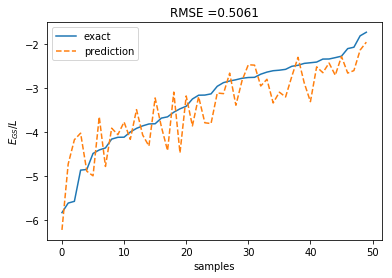

In [19]:
pred = model.predict(test_data, batch_size=128)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_rand_500_test')

## Pool

In [21]:
dataset_x = pd.read_csv('csv/x_test_pool_retrain_500.csv')
dataset_y = pd.read_csv('csv/y_test_pool_retrain_500.csv')

path_folder = 'data/matrix_pool_500/'

#writing the columns of the csv in an list
x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [22]:
model = load_model('h5/retrain_pool_500.h5')

50/50 [==============================] - 5s 97ms/step
Score (RMSE): 0.10770684056968804


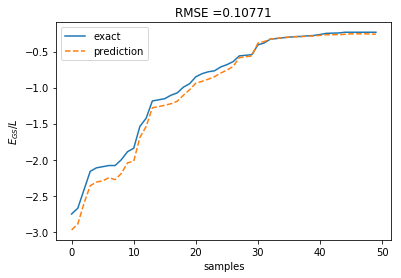

In [24]:
pred = model.predict(test_data, batch_size=128,verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_pool_500_test')

---
# Retrain 1k
---

## Random

In [26]:
dataset_x = pd.read_csv('csv/x_test_rand_retrain_1k.csv')
dataset_y = pd.read_csv('csv/y_test_rand_retrain_1k.csv')

path_folder = 'data/matrix_rand_1k//'

#writing the columns of the csv in an list
x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [27]:
model = load_model('h5/retrain_rand_1k.h5')

100/100 [==============================] - 10s 97ms/step
Score (RMSE): 0.411783127528642


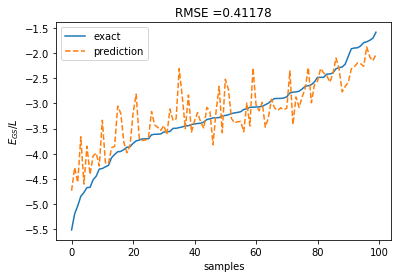

In [29]:
pred = model.predict(test_data, batch_size=128, verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_rand_1k_test')

## Pool

In [30]:
dataset_x = pd.read_csv('csv/x_test_pool_retrain_1k.csv')
dataset_y = pd.read_csv('csv/y_test_pool_retrain_1k.csv')

path_folder = 'data/matrix_pool_1k/'

#writing the columns of the csv in an list
x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [31]:
model = load_model('h5/retrain_pool_1k.h5')

100/100 [==============================] - 10s 102ms/step
Score (RMSE): 0.09719719362809788


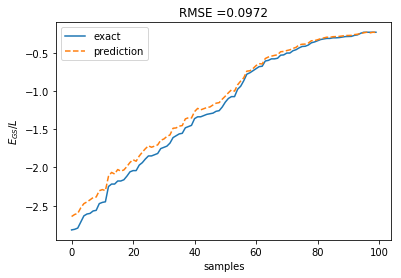

In [32]:
pred = model.predict(test_data, batch_size=128,verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_pool_1k_test')

---
# Retrain 5k
---

## Random

In [33]:
dataset_x = pd.read_csv('csv/x_test_rand_retrain_5k.csv')
dataset_y = pd.read_csv('csv/y_test_rand_retrain_5k.csv')

path_folder = 'data/matrix_rand_5k/'

#writing the columns of the csv in an list
x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [34]:
model = load_model('h5/retrain_rand_5k.h5')

500/500 [==============================] - 49s 99ms/step
Score (RMSE): 0.34683049896530543


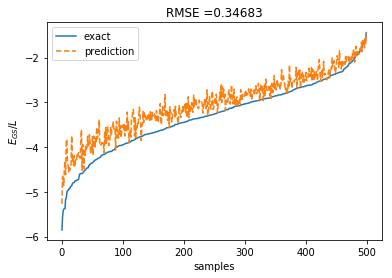

In [35]:
pred = model.predict(test_data, batch_size=128, verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_rand_5k_test')

## Pool

In [36]:
dataset_x = pd.read_csv('csv/x_test_pool_retrain_5k.csv')
dataset_y = pd.read_csv('csv/y_test_pool_retrain_5k.csv')

path_folder = 'data/matrix_pool_5k//'

#writing the columns of the csv in an list
x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [37]:
model = load_model('h5/retrain_pool_5k.h5')

500/500 [==============================] - 49s 99ms/step
Score (RMSE): 0.10310340238569268


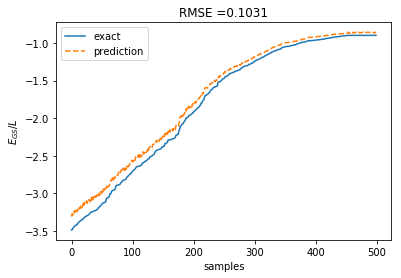

In [38]:
pred = model.predict(test_data, batch_size=128,verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_pool_5k_test')

---
# Train 1k
---

## Random

In [39]:
dataset_x = pd.read_csv('csv/x_test_rand_train_1k.csv')
dataset_y = pd.read_csv('csv/y_test_rand_train_1k.csv')

path_folder = 'data/matrix_rand_1k_train/'

#writing the columns of the csv in an list
x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [40]:
model = load_model('h5/rand_train_1k.h5')

100/100 [==============================] - 11s 108ms/step
Score (RMSE): 0.45117996807851257


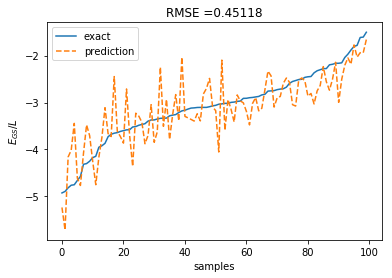

In [41]:
pred = model.predict(test_data, batch_size=128, verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_rand_1k_test_train')

## Pool

In [42]:
dataset_x = pd.read_csv('csv/x_test_pool_train_1k.csv')
dataset_y = pd.read_csv('csv/y_test_pool_train_1k.csv')

path_folder = 'data/matrix_pool_train_1k/'

#writing the columns of the csv in an list
x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [43]:
model = load_model('h5/train_pool_1k.h5')

100/100 [==============================] - 11s 110ms/step
Score (RMSE): 0.11429127339658202


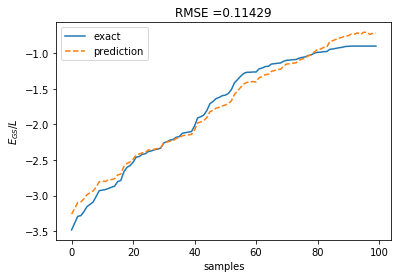

In [44]:
pred = model.predict(test_data, batch_size=128,verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_pool_1k_test_train')

---
# 25k
---

## Rand

In [32]:
dataset_x = pd.read_csv('csv/x_test_rand_train_25k.csv')
dataset_y = pd.read_csv('csv/y_test_rand_train_25k.csv')

path_folder = 'data/matrix_rand_25k_train/'

#writing the columns of the csv in an list
x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [33]:
model = load_model('h5/rand_train_25k.h5')

2500/2500 [==============================] - 254s 102ms/step
Score (RMSE): 0.7076151220692025


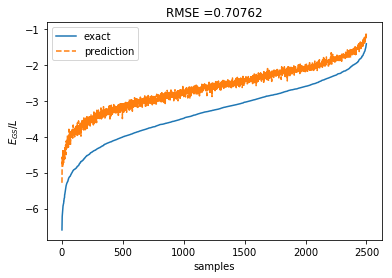

In [34]:
pred = model.predict(test_data, batch_size=128, verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_rand_25k_test_train')

---
# Train 50k
---

## Rand

In [4]:
dataset_x = pd.read_csv('csv/x_test_rand_train_50k.csv')
dataset_y = pd.read_csv('csv/y_test_rand_train_50k.csv')

path_folder = 'data/matrix_rand_50k_train/'

#writing the columns of the csv in an list
x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []

load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [3]:
model = load_model('h5/rand_train_50k.h5')

1000/1000 [==============================] - 114s 114ms/step
Score (RMSE): 0.2059529695097349


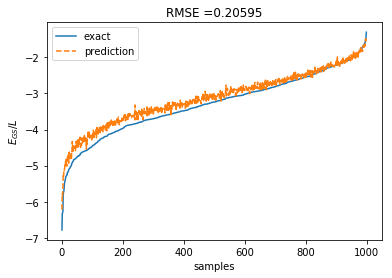

In [5]:
pred = model.predict(test_data, batch_size=128, verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='pred_rand_25k_test_train')

---
# Pool L = 16
---

In [14]:
dataset_x = pd.read_csv('csv/xtest_l16_pool_10k.csv')
dataset_y = pd.read_csv('csv/ytest_l16_pool_10k.csv')

path_folder = 'data/matrix_16_fortran/'

x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []
load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [3]:
model = load_model('h5/train_l16_pool_10k.h5')

Score (RMSE): 0.26912805576136206


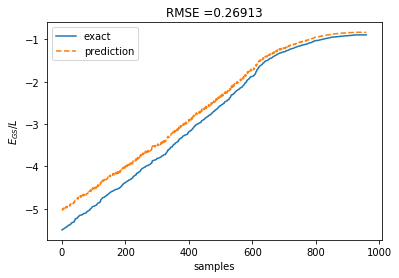

In [16]:
pred = model.predict(test_data, batch_size=128)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='train_l16')

## 20k

In [4]:
dataset_x = pd.read_csv('csv/x_test_l16_20k.csv')
dataset_y = pd.read_csv('csv/y_test_l16_20k.csv')

path_folder = 'data/matrix_16_20k/'

x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []
load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [4]:
print(x_test.shape)

(200,)


In [5]:
model = load_model('h5/train_l16_20k.h5')

200/200 [==============================] - 20s 98ms/step
Score (RMSE): 0.06380012712256235


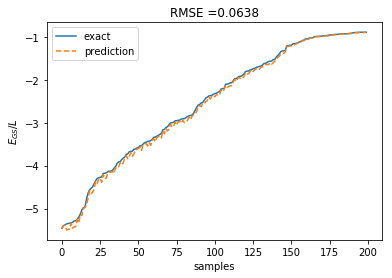

In [6]:
pred = model.predict(test_data, batch_size=128, verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='train_l16_20k')

In [7]:
y_true = np.sort(test_label)
y_pred = np.sort(np.squeeze(pred))
error = np.abs(np.subtract(y_pred,y_true))

1.8477394067574668


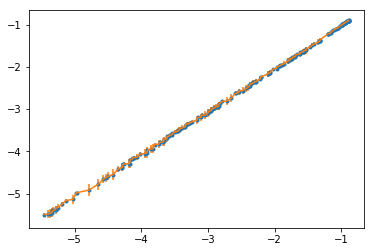

In [8]:
x = y_true
y = y_pred
ylower = y - error
yhigh = y + error

score =np.mean(np.abs((x - y) / x)) * 100


graph = plt.plot(x, y,'.')
plt.errorbar(x,y, yerr=error)
print(score)

In [9]:
y_true = np.sort(test_label)
y_pred = np.sort(np.squeeze(pred))
error = np.divide(np.abs(np.subtract(y_pred,y_true)), y_true)*100

bin_edges = [(y_true[i]+y_true[i+1])/2 for i in range((len(y_true)-1))]

results = make_bin(y_true, y_pred,bin_edges,method='percentile')

results_residual = make_bin(y_true, error, bin_edges, method='percentile')

<class 'numpy.ndarray'>
(200,)
zero bin std data:
[-5.48551]
zero bin std data:
[-5.478584]
zero bin std data:
[-5.4603086]
zero bin std data:
[-5.4578013]
zero bin std data:
[-5.424314]
zero bin std data:
[-5.423528]
zero bin std data:
[-5.401954]
zero bin std data:
[-5.3818727]
zero bin std data:
[-5.339108]
zero bin std data:
[-5.334227]
zero bin std data:
[-5.2593217]
zero bin std data:
[-5.1665525]
zero bin std data:
[-5.1391377]
zero bin std data:
[-4.991859]
zero bin std data:
[-4.98074]
zero bin std data:
[-4.9181685]
zero bin std data:
[-4.775209]
zero bin std data:
[-4.6562552]
zero bin std data:
[-4.6230063]
zero bin std data:
[-4.587458]
zero bin std data:
[-4.551089]
zero bin std data:
[-4.4231834]
zero bin std data:
[-4.3873734]
zero bin std data:
[-4.3736825]
zero bin std data:
[-4.3059835]
zero bin std data:
[-4.3009686]
zero bin std data:
[-4.2934027]
zero bin std data:
[-4.2907643]
zero bin std data:
[-4.2045975]
zero bin std data:
[-4.1825986]
zero bin std data:
[-4.

No handles with labels found to put in legend.


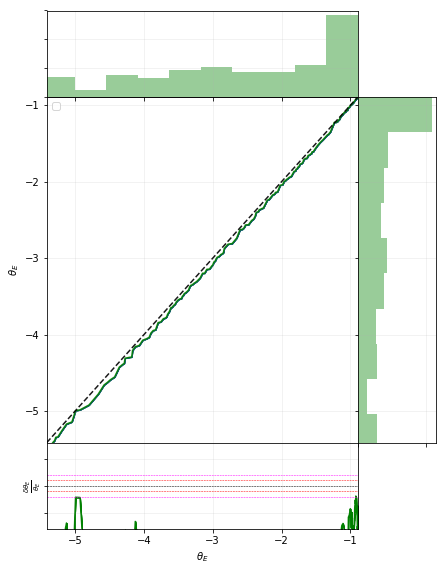

In [10]:
plot_regression_results(results, results_residual,truth_values=np.unique(y_true),individual_truth_values=y_true,individual_medians=y_pred)

# Negativity

In [8]:
dataset_x = pd.read_csv('csv/x_test_neg.csv')
dataset_y = pd.read_csv('csv/y_test_neg.csv')

path_folder = 'data/matrix_neg/'

x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []
load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [9]:
model = load_model('h5/train_neg.h5')

100/100 [==============================] - 25s 246ms/step
Score (RMSE): 0.009894175362264807


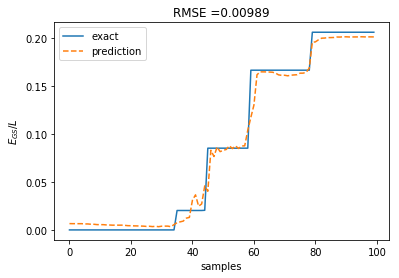

In [6]:
pred = model.predict(test_data, batch_size=128, verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='train_neg')

(10000,)


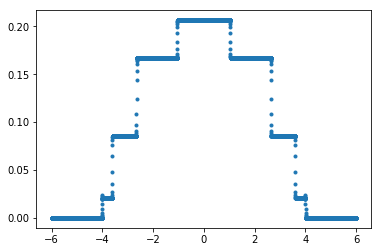

In [7]:
dataset = np.loadtxt('neg-delta=-1.dat')

x_dat, y_dat = dataset[:,0],dataset[:,1]

print(y_dat.shape)

gr = plt.plot(x_dat,y_dat,'.')


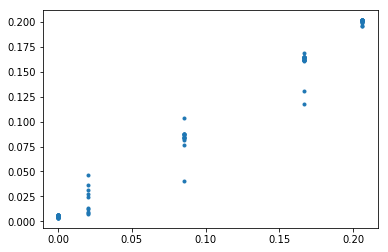

In [25]:
# example data
x =(y_true)
y = (y_pred)

# example variable error bar values


graph = plt.plot(x,y,'.')


In [3]:
def plot_regression_results(
        results,results_residuals,
        truth_values,individual_truth_values,
        individual_medians,plot_std=True,
        bin_edges=10,real_data=None,
        plot_dropout_err=True, plot_name='regression.png',
        xlabel='$\\theta_{E}$',ylabel='$\\theta_{E}$',
        xmin=None, xmax=None,
        ymin=None, ymax=None,
        color_std='blue', color_err='green',
        color_pop='magenta',plot_label=None,
        fill_label_std=None, fill_label_err=None,
        figsize=(6, 8),alpha_hist=0.4, 
        pop_error=None,pop_error_residuals=None,
        plot_real_residuals=False):
   
    pop_err=pop_error
    pop_err_r=pop_error_residuals
    x_bin,y_bin,y_bin_std,y_bin_percentile1sig,y_bin_percentile2sig,y_bin_percentile3sig=results
    x_bin,yr_bin,yr_bin_std,yr_bin_percentile1sig,yr_bin_percentile2sig,yr_bin_percentile3sig=results_residuals


    if type(xmin)==type(None):
        if type(bin_edges)!=type(10):
            xmin=min(bin_edges)
            xmax=max(bin_edges)
        else:
            xmin=min(x_bin)
            xmax=max(x_bin)


    imed=individual_medians
    itruth=individual_truth_values 

    ty_bin_percentile1sig=np.transpose(y_bin_percentile1sig)
    ty_bin_percentile2sig=np.transpose(y_bin_percentile2sig)
    ty_bin_percentile3sig=np.transpose(y_bin_percentile3sig)

    tyr_bin_percentile1sig=np.transpose(yr_bin_percentile1sig)
    tyr_bin_percentile2sig=np.transpose(yr_bin_percentile2sig)
    tyr_bin_percentile3sig=np.transpose(yr_bin_percentile3sig)
    
    # ================================
    # Initialize figure canvas
    # ================================
    ymax = xmax
    ymin = xmin
    # set up figure
    fig = plt.figure(figsize=figsize)         
    
    # set up grid of panels in figure
    grid = plt.GridSpec(3, 2, hspace=0.0, wspace=0.0, 
                        left=0.1, right=1.0, bottom=0.1, top=1.0,
                        height_ratios=[1, 4, 1], width_ratios=[4,1])
         
    # main axis: predicted statistic vs. true statistic
    ax_main = fig.add_subplot(grid[1,0])
    
    # hist axis [x]: histogram of data on x axis on top
    ax_hist_x = fig.add_subplot(grid[0, 0], sharex=ax_main)
    
    # hist axis [y]: histogram of data on y axis on right
    ax_hist_y = fig.add_subplot(grid[1, 1], sharey=ax_main)
    
    # res axis: residual of statistic vs. true stratistic
    ax_diff = fig.add_subplot(grid[2,0], sharex=ax_main)
    
    
    # calculate upper and lower bounds [for systematic error bars]
    if plot_std==True:
        lo_err, up_err = measure_uplow_std_limits(y_bin, y_bin_std, nsigma=1)#(ys_bin, ys_err_bin)

    # calculate upper and lower bounds on diff [for systematic error bars]
    if plot_std==True:
        lo_err_diff, up_err_diff = measure_uplow_std_limits(yr_bin, yr_bin_std, nsigma=1)
        

    # ================================
    # Plot data [sim]
    # ================================
    # plot: dropout medians [main axis]
    ax_main.plot(x_bin,y_bin, color=color_err, alpha=0.9, label=plot_label)
    
    # plot: dropouts percentile errors [main axis]
    if plot_dropout_err==True:
        ax_main.fill_between(x_bin, ty_bin_percentile1sig[0], ty_bin_percentile1sig[1], color=color_err, alpha=0.5, label=fill_label_err)
        ax_main.fill_between(x_bin, ty_bin_percentile2sig[0], ty_bin_percentile2sig[1], color=color_err, alpha=0.4)
        ax_main.fill_between(x_bin, ty_bin_percentile3sig[0], ty_bin_percentile3sig[1], color=color_err, alpha=0.3)
    
    # plot: one-to-one line [main axis]
    ax_main.plot([xmin, xmax], [ymin, ymax], color='black', ls='dashed', alpha=0.9)
    
    # plot: errors from standard deviation [main axis]
    if plot_std==True:
        ax_main.fill_between(x_bin, lo_err, up_err, color=color_std, alpha=0.4, label=fill_label_std)
    
    # plot: deltas [diff axis]
    ax_diff.plot(x_bin,yr_bin, color=color_err, alpha=0.9)
    
    # plot: statistical errors [diff axis]
    if plot_dropout_err==True:
        ax_diff.fill_between(x_bin, tyr_bin_percentile1sig[0], tyr_bin_percentile1sig[1], color=color_err, alpha=0.5, label=fill_label_err)
        ax_diff.fill_between(x_bin, tyr_bin_percentile2sig[0], tyr_bin_percentile2sig[1], color=color_err, alpha=0.4)
        ax_diff.fill_between(x_bin, tyr_bin_percentile3sig[0], tyr_bin_percentile3sig[1], color=color_err, alpha=0.3)
    
    # plot: systematic errors [main axis]
    if plot_std==True:
        ax_diff.fill_between(x_bin, lo_err_diff, up_err_diff, color=color_err, alpha=0.9, label=fill_label_std)
    
    # plot: errors from medians
    if pop_error!=None:
        xp_bin,yp_bin,yp_bin_std,yp_bin_percentile1sig,yp_bin_percentile2sig,yp_bin_percentile3sig=pop_err
        xp_bin,ypr_bin,ypr_bin_std,ypr_bin_percentile1sig,ypr_bin_percentile2sig,ypr_bin_percentile3sig=results_residuals=pop_err_r
        typ_bin_percentile1sig=np.transpose(yp_bin_percentile1sig)
        typr_bin_percentile1sig=np.transpose(ypr_bin_percentile1sig)
        ax_main.fill_between(xp_bin, typ_bin_percentile1sig[0], typ_bin_percentile1sig[1], color=color_pop, alpha=0.4)
        ax_diff.fill_between(xp_bin, typr_bin_percentile1sig[0], typr_bin_percentile1sig[1], color=color_pop, alpha=0.4)
    # plot: zero line [res axis]
    xmin_line, xmax_line = ax_diff.get_xlim()
    ax_diff.axhline(y=0.2, ls='dashed', color='magenta', lw=0.5)
    ax_diff.axhline(y=0.1, ls='dashed', color='red', lw=0.5)
    ax_diff.axhline(y=0, ls='dashed', color='black', lw=0.5)
    ax_diff.axhline(y=-0.1, ls='dashed', color='red', lw=0.5)
    ax_diff.axhline(y=-0.2, ls='dashed', color='magenta', lw=0.5)

        
    # ================================
    # Plot data [simulation]
    # ================================
    # plot: histogram on upper x axis
    ax_hist_x.hist(itruth, bin_edges, 
                   color=color_err, alpha=alpha_hist, 
                   histtype='stepfilled')
    
    # plot: histogram on right y axis
    blank = ax_hist_y.hist(imed, bin_edges, 
                   color=color_err, alpha=alpha_hist,
                   histtype='stepfilled',
                   orientation='horizontal')
        
    # plot: sky data main_axis
    if type(real_data)!=type(None):
        print('real data')
        print(np.array(real_data).shape)
        if plot_real_residuals==False:
            real_tr,real_me,real_lo,real_hi=np.transpose(real_data)
        else:
            real_tr,real_me,real_lo,real_hi,realr_me,realr_lo,realr_hi=np.transpose(real_data)
        yerr_lo=real_me - real_lo
        yerr_hi= real_hi - real_me

        yerr_lor=realr_me - realr_lo
        yerr_hir= realr_hi - realr_me

        #res_me=np.divide(real_me-real_tr,real_tr)
        ax_main.errorbar(real_tr, real_me, yerr=[yerr_lo,yerr_hi], fmt='ko', markersize=5,label='DES')
        ax_diff.errorbar(real_tr, realr_me, yerr=[yerr_lor,yerr_hir], fmt='ko', markersize=5,label='DES')


    
    # ================================
    # Set plot options
    # ================================
    # set plot options [main axis]
    plt.setp(ax_main.get_xticklabels(), visible=False)
    plt.setp(ax_main.get_yticklabels(), visible=True)
    plt.setp(ax_diff.get_yticklabels(), visible=False)
    plt.setp(ax_hist_x.get_xticklabels(), visible=False)
    plt.setp(ax_hist_x.get_yticklabels(), visible=False)
    plt.setp(ax_hist_y.get_yticklabels(), visible=False)
    plt.setp(ax_hist_y.get_xticklabels(), visible=False)
    ax_main.set_ylabel(ylabel)
    ax_main.autoscale(enable=True,axis='both')
    #ax_main.axis('equal')
    ax_main.set_xlim((xmin, xmax))   
    ax_main.set_ylim((xmin, xmax))
    ax_main.set_ylabel(ylabel)   
    ax_main.grid(True, alpha=0.2) 
    ax_hist_x.grid(True,alpha=0.2)
    ax_hist_y.grid(True,alpha=0.2)
    ax_main.legend()
    #ax_main.set_aspect('equal')
    
    # set plot options [residual axis]
    ax_diff.set_ylim((-0.8,0.8))
    ax_diff.set_xlabel(xlabel)
    ylabel_plain=ylabel.replace('$','')
    ax_diff.set_ylabel('$\\frac{\\delta '+ylabel_plain+'}{'+ylabel_plain+'}$')
    ax_diff.grid(True, alpha=0.2)


    plt.savefig(plot_name)


def make_bin(col1_dat,col2_dat,bin_edges,return_vals=False,method="mean"):
    """
    col1= array like of the x values
    col2= array like of the y values
    Funtion that bins in x of a sample of (x,y) pairs.
    USe the return_vals if you want a list of y values in each bin
    """
    print (type(col2_dat))
    print (np.array(col2_dat).shape)
    bin_vals = [[] for x in range(0,len(bin_edges)-1)]
    bin_valsx = [[] for x in range(0,len(bin_edges)-1)]
    bin_median=np.zeros(len(bin_edges)-1)
    bin_mean=np.zeros(len(bin_edges)-1)
    bin_std=np.zeros(len(bin_edges)-1)
    bin_center=np.zeros(len(bin_edges)-1)

    bin_percentile1sig=[[] for x in range(0,len(bin_edges)-1)]
    bin_percentile2sig=[[] for x in range(0,len(bin_edges)-1)]
    bin_percentile3sig=[[] for x in range(0,len(bin_edges)-1)]

    for i in range(0,len(col1_dat)):
        for j in range(0,len(bin_edges)-1):
            if bin_edges[j] <= col1_dat[i] <= bin_edges[j+1]:
                bin_vals[j].append(col2_dat[i])
                bin_valsx[j].append(col1_dat[i])            

    for i in range(0,len(bin_edges)-1):
        try:
            bin_mean[i]=np.mean(bin_vals[i])
        except:
            print(type(bin_vals[i]))
            print("Error!")
        bin_median[i]=np.median(bin_vals[i])
        bin_std[i]=np.std(bin_vals[i])
        if method=="percentile":
            if len(bin_vals[i])!=0:
                
                lowlim=np.percentile(bin_vals[i],15.87)
                highlim=np.percentile(bin_vals[i],84.13)
                lowlim2sig=np.percentile(bin_vals[i],2.25)
                highlim2sig=np.percentile(bin_vals[i],97.6)
                lowlim3sig=np.percentile(bin_vals[i],0.15)
                highlim3sig=np.percentile(bin_vals[i],99.7)
            else:
                lowlim=0
                highlim=0
                lowlim2sig=0
                highlim2sig=0
                lowlim3sig=0
                highlim3sig=0
            bin_percentile1sig[i]=[lowlim,highlim]
            bin_percentile2sig[i]=[lowlim2sig,highlim2sig]
            bin_percentile3sig[i]=[lowlim3sig,highlim3sig]
            
        if bin_std[i]<0.001:
            print("zero bin std data:")
            print(bin_vals[i])
        bin_center[i]= (bin_edges[i]+bin_edges[i+1])/2

    if return_vals==False:
        if method=='median':
            return bin_center,bin_median,bin_std
        elif method=='percentile':
            return bin_center,bin_median,bin_std,bin_percentile1sig,bin_percentile2sig,bin_percentile3sig,       
        else:
            return bin_center,bin_mean,bin_std
    else:
        # if you want the a list of values inside each bin,
        # so you can perform your own bin metrics.
        return bin_center,bin_valsx,bin_vals
    
def measure_uplow_std_limits(ybin, bin_stdevs, nsigma=1):
    lo = [ybin[i] - nsigma*bin_stdevs[i] for i in range(0,len(ybin))] 
    hi = [ybin[i] + nsigma*bin_stdevs[i] for i in range(0,len(ybin))]
        
    return lo, hi

In [25]:
y_true = np.sort(test_label)
y_pred = np.sort(np.squeeze(pred))
error = np.divide(np.abs(np.subtract(y_pred,y_true)), y_true)*100

bin_edges = [(y_true[i]+y_true[i+1])/2 for i in range((len(y_true)-1))]

results = make_bin(y_true, y_pred,bin_edges,method='percentile')

results_residual = make_bin(y_true, error, bin_edges, method='percentile')

<class 'numpy.ndarray'>
(200,)
zero bin std data:
[-5.48551]
zero bin std data:
[-5.478584]
zero bin std data:
[-5.4603086]
zero bin std data:
[-5.4578013]
zero bin std data:
[-5.424314]
zero bin std data:
[-5.423528]
zero bin std data:
[-5.401954]
zero bin std data:
[-5.3818727]
zero bin std data:
[-5.339108]
zero bin std data:
[-5.334227]
zero bin std data:
[-5.2593217]
zero bin std data:
[-5.1665525]
zero bin std data:
[-5.1391377]
zero bin std data:
[-4.991859]
zero bin std data:
[-4.98074]
zero bin std data:
[-4.9181685]
zero bin std data:
[-4.775209]
zero bin std data:
[-4.6562552]
zero bin std data:
[-4.6230063]
zero bin std data:
[-4.587458]
zero bin std data:
[-4.551089]
zero bin std data:
[-4.4231834]
zero bin std data:
[-4.3873734]
zero bin std data:
[-4.3736825]
zero bin std data:
[-4.3059835]
zero bin std data:
[-4.3009686]
zero bin std data:
[-4.2934027]
zero bin std data:
[-4.2907643]
zero bin std data:
[-4.2045975]
zero bin std data:
[-4.1825986]
zero bin std data:
[-4.

No handles with labels found to put in legend.


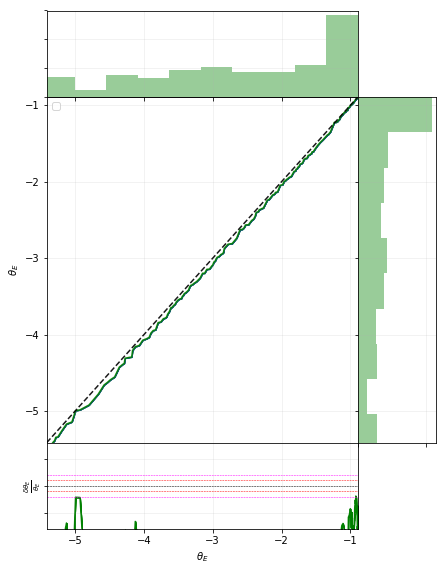

In [26]:
plot_regression_results(results, results_residual,truth_values=np.unique(y_true),individual_truth_values=y_true,individual_medians=y_pred)

## Neg del 0

In [4]:
dataset_x = pd.read_csv('csv/x_test_neg_del0.csv')
dataset_y = pd.read_csv('csv/y_test_neg_del0.csv')

path_folder = 'data/matrix_neg_del_0//'

x_test = dataset_x.iloc[:,1].values
y_test = dataset_y.iloc[:,1].values

test_data = []
load_test_data = []
for file in x_test:
        path = os.path.abspath(path_folder+ file)
        H = np.load(path)
        load_test_data.append(H)
load_test_data = np.array(load_test_data)
test_data = load_test_data[:,:,:,np.newaxis]
test_data -= np.mean(test_data)
test_data /= np.std(test_data)

test_label = []
for file in y_test:
    test_label.append(file)
test_label = np.array(test_label)

In [5]:
model = load_model('h5/train_neg_del0.h5')

100/100 [==============================] - 10s 97ms/step
Score (RMSE): 0.005405196906876172


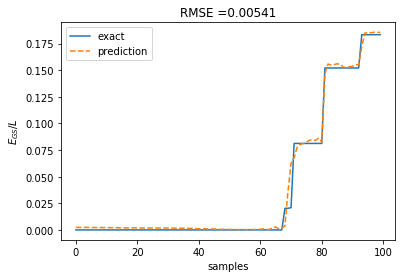

In [6]:
pred = model.predict(test_data, batch_size=128, verbose=1)
score = np.sqrt(metrics.mean_squared_error(pred,test_label))
print("Score (RMSE): {}".format(score))

chart_regression(pred.flatten(),test_label, plot_name='train_neg_del0')

(10000,)


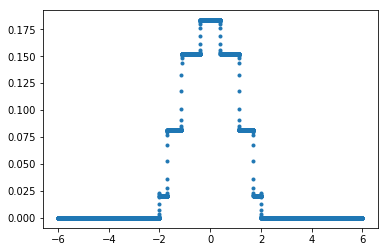

In [7]:
dataset = np.loadtxt('neg_del_0.dat')

x_dat, y_dat = dataset[:,0],dataset[:,1]

print(y_dat.shape)

gr = plt.plot(x_dat,y_dat,'.')
